In [2]:
print("Hello world")
%pylab inline

Hello world
Populating the interactive namespace from numpy and matplotlib


In [3]:
import scipy

In [4]:
import scipy.io.wavfile

In [5]:
scipy.io.wavfile.read('test.wav')

(44100, array([[  0,   0],
        [ -1,   0],
        [  0,   0],
        ...,
        [144, 163],
        [113, 147],
        [ 73,  88]], dtype=int16))

In [6]:
freq, data = scipy.io.wavfile.read('test.wav')

In [24]:
print(freq)
print(data)
print(fft.ifft(fft.fft(data)))

44100
[[  0   0]
 [ -1   0]
 [  0   0]
 ...
 [144 163]
 [113 147]
 [ 73  88]]
[[  0.+0.j   0.+0.j]
 [ -1.+0.j   0.+0.j]
 [  0.+0.j   0.+0.j]
 ...
 [144.+0.j 163.+0.j]
 [113.+0.j 147.+0.j]
 [ 73.+0.j  88.+0.j]]


In [8]:
print(data)

[[  0   0]
 [ -1   0]
 [  0   0]
 ...
 [144 163]
 [113 147]
 [ 73  88]]


In [9]:
print(len(data))

8833224


In [10]:
for i in range(0,30):
    print(data[i])

[0 0]
[-1  0]
[0 0]
[ 0 -1]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[0 0]
[-5 -4]
[7 7]
[-17 -16]
[30 29]
[-88 -84]
[-347 -338]
[-384 -389]
[-407 -390]
[-386 -349]
[-418 -412]
[-433 -413]
[-409 -389]
[-356 -342]
[-329 -318]
[-404 -397]
[-462 -443]
[-410 -394]
[-424 -406]
[-432 -428]
[-422 -427]


In [11]:
c = asarray(data, dtype = np.int16)

In [12]:
print(c)

[[  0   0]
 [ -1   0]
 [  0   0]
 ...
 [144 163]
 [113 147]
 [ 73  88]]


In [13]:
scipy.io.wavfile.write('reecrit.wav', freq, c)

In [14]:
duree = ((1.0*(len(data)))/(freq))

In [15]:
print(duree)

200.29986394557824


In [16]:
len(data)

8833224

In [17]:
len(data) /  44100

200.29986394557824

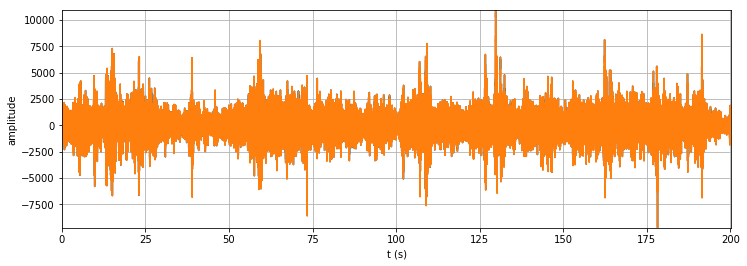

In [18]:
n = len(data)
te = 1.0/freq
t = zeros(n)
for k in range(n):
    t[k] = te*k
figure(figsize=(12,4))
plot(t,data)
xlabel("t (s)")
ylabel("amplitude") 
axis([0,duree,data.min(),data.max()])
grid()

In [ ]:
#Ce bloc fait crasher le noyau
def tracerSpectre(data,rate,debut,duree):
    start = int(debut*rate)
    stop = int((debut+duree)*rate)
    spectre = absolute(fft.fft(data[start:stop]))
    spectre = spectre/spectre.max()#fait un ratio
    n = spectre.size
    freq = zeros(n)
    for k in range(n):
        freq[k] = 1.0/n*rate*k
    vlines(freq,[0],spectre,'r')
    xlabel('f (Hz)')
    ylabel('A')
    axis([0,0.5*rate,0,1])
    grid()


figure(figsize=(12,4))
tracerSpectre(data,freq,0,len(data))
axis([0,50000,0,1])


In [19]:
print(len(data), freq)

8833224 44100


4416613


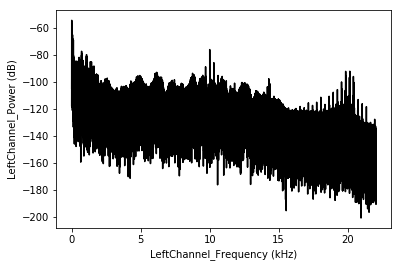

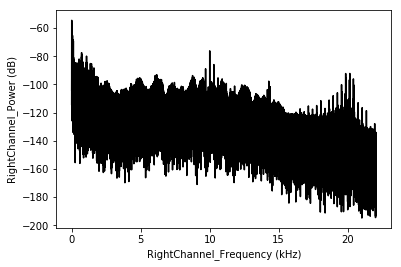

In [20]:
#Test en séparant les 2 canaux stéréo
#Fonctionne !!!!!!
def plot(file_name):

    sampFreq, snd = scipy.io.wavfile.read(file_name)

    snd = snd / (2.**15) #convert sound array to float pt. values

    s1 = snd[:,0] #left channel

    s2 = snd[:,1] #right channel

    n = len(s1)
    p = fft.fft(s1) # take the fourier transform of left channel
    ma_var = p

    m = len(s2) 
    p2 = fft.fft(s2) # take the fourier transform of right channel
    ma_var2 = p2

    nUniquePts = int(ceil((n+1)/2.0))
    print(nUniquePts)
    p = p[0:nUniquePts]
    p = abs(p)

    mUniquePts = int(ceil((m+1)/2.0))
    p2 = p2[0:mUniquePts]
    p2 = abs(p2)

    #'''
    #Left Channel
    #'''
    p = p / float(n) # scale by the number of points so that
                     # the magnitude does not depend on the length 
                     # of the signal or on its sampling frequency  
    p = p**2  # square it to get the power 




# multiply by two (see technical document for details)
# odd nfft excludes Nyquist point
    if n % 2 > 0: # we've got odd number of points fft
        p[1:len(p)] = p[1:len(p)] * 2
    else:
        p[1:len(p) -1] = p[1:len(p) - 1] * 2 # we've got even number of points fft

    freqArray = arange(0, nUniquePts, 1.0) * (sampFreq / n);
    plt.plot(freqArray/1000, 10*log10(p), color='k')
    plt.xlabel('LeftChannel_Frequency (kHz)')
    plt.ylabel('LeftChannel_Power (dB)')
    plt.show()

    #'''
    #Right Channel
    #'''
    p2 = p2 / float(m) # scale by the number of points so that
             # the magnitude does not depend on the length 
             # of the signal or on its sampling frequency  
    p2 = p2**2  # square it to get the power 




    # multiply by two (see technical document for details)
    # odd nfft excludes Nyquist point
    if m % 2 > 0: # we've got odd number of points fft
         p2[1:len(p2)] = p2[1:len(p2)] * 2
    else:
         p2[1:len(p2) -1] = p2[1:len(p2) - 1] * 2 # we've got even number of points fft

    freqArray2 = arange(0, mUniquePts, 1.0) * (sampFreq / m);
    plt.plot(freqArray2/1000, 10*log10(p2), color='k')
    plt.xlabel('RightChannel_Frequency (kHz)')
    plt.ylabel('RightChannel_Power (dB)')
    plt.show()
    #return freqArray, freqArray2
    return ma_var, ma_var2
    
gauchefreq, droitefreq = plot("test.wav")

In [21]:
#Tourne soit a l infini soit juste tres longtemps
gauchefreq2 = concatenate((gauchefreq, array([0])))
#gauchefreq2 = gauchefreq[1:]
droitefreq2 = concatenate((droitefreq, array([0])))
#droitefreq2 = droitefreq[1:]
print(gauchefreq2, droitefreq2)
print(len(gauchefreq2), len(droitefreq2))
#gauche = fft.ifft(gauchefreq2)
gauche = fft.ifft(gauchefreq)
#droite = fft.ifft(droitefreq2)
droite = fft.ifft(droitefreq)
print(len(gauche), len(droite))
print(gauche)
print("droite")
print(droite)

[-51.08520508+0.j         -51.14033536+0.16985206j
 -51.06131516+0.4239557j  ... -51.06131516-0.4239557j
 -51.14033536-0.16985206j   0.        +0.j        ] [-55.65054321+0.j         -55.61212369+0.16692148j
 -55.68302304+0.39348143j ... -55.68302304-0.39348143j
 -55.61212369-0.16692148j   0.        +0.j        ]
8833225 8833225
8833224 8833224
[-6.58962808e-18-2.96365157e-17j -3.05175781e-05-4.39651937e-17j
  2.88296229e-18-3.93144974e-17j ...  4.39453125e-03-3.15780566e-17j
  3.44848633e-03-3.83151002e-17j  2.22778320e-03-2.95456136e-17j]
droite
[3.29481404e-18-1.92702054e-17j 1.21496268e-17-1.88027544e-17j
 1.23555527e-17-2.24975842e-17j ... 4.97436523e-03-1.25489392e-17j
 4.48608398e-03-3.57637818e-17j 2.68554688e-03-1.62855021e-17j]


In [ ]:
# Si on doit traiter tout les sons en mono il faut le reconvertir en stereo 
# Apparemment cette fonction marche faudra tester
#import wave, array
#
#def make_stereo(file1, output):
#    ifile = wave.open(file1)
#    print ifile.getparams()
#    # (1, 2, 44100, 2013900, 'NONE', 'not compressed')
#    (nchannels, sampwidth, framerate, nframes, comptype, compname) = ifile.getparams()
#    assert comptype == 'NONE'  # Compressed not supported yet
#    array_type = {1:'B', 2: 'h', 4: 'l'}[sampwidth]
#    left_channel = array.array(array_type, ifile.readframes(nframes))[::nchannels]
#    ifile.close()
#
#    stereo = 2 * left_channel
#    stereo[0::2] = stereo[1::2] = left_channel
#
#    ofile = wave.open(output, 'w')
#    ofile.setparams((2, sampwidth, framerate, nframes, comptype, compname))
#    ofile.writeframes(stereo.tostring())
#    ofile.close()
#
#make_stereo("Input.wav", "Output.wav")

In [22]:
def make_stereo(left, right):
    stereo = []
    for i in range(0, len(left)):
        stereo += [[left[i]] + [right[i]]]
    return asarray(stereo, dtype = np.int16)

In [24]:
# Voir un éventuelle probleme d'échantillon non puissance de 2
# https://stackoverflow.com/questions/47982785/python-performing-fft-on-music-file
def tracerSpectre2(data,rate):
    spectre = absolute(fft.fft(data))
    spectre = spectre/spectre.max()#fait un ratio
    n = spectre.size
    freq = zeros(n)
    print("apres 0")
    for k in range(n):
        freq[k] = 1.0/n*rate*k
    print("Apres le for")
    #vlines(freq,[0],spectre,'r')#x, ymin, ymax, color permet de tracer des lignes verticales
    print(freq)
    print("spectre")
    print(spectre)
    for k in freq:
        vlines(k[0], 0, spectre, 'r')
        vlines(k[1], 0, spectre, 'r')
    print("apres for 2")
    xlabel('f (Hz)')
    ylabel('A')
    axis([0,50000,0,1])
    grid()
    
figure(figsize=(12,4))
tracerSpectre2(data,freq)
#axis([0,50000,0,1])

apres 0
Apres le for
[0.00000000e+00 2.49625731e-03 4.99251462e-03 ... 4.40999925e+04
 4.40999950e+04 4.40999975e+04]
spectre
[[0.00000000e+00 0.00000000e+00]
 [4.58211144e-05 4.58211144e-05]
 [0.00000000e+00 0.00000000e+00]
 ...
 [1.40670821e-02 8.70601173e-04]
 [1.19134897e-02 1.55791789e-03]
 [7.37719941e-03 6.87316716e-04]]


IndexError: invalid index to scalar variable.

<Figure size 864x288 with 0 Axes>

In [20]:
spectre = absolute(fft.fft(data[0:len(data)]))
print(spectre)

[[  0.   0.]
 [  1.   1.]
 [  0.   0.]
 ...
 [307.  19.]
 [260.  34.]
 [161.  15.]]


In [21]:
len(spectre)

8833224

In [23]:
#Test de réecoute après ifft + remise en stereo
#gauche = fft.ifft(gauchefreq)
#droite = fft.ifft(droitefreq)
signal = make_stereo(gauche, droite)
print(len(signal))
print(signal)
scipy.io.wavfile.write('reecrit.wav', 44100, signal)

/home/parallels/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


8833224
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [33]:
#test du suppression des hautes fréquences
spectretest = []
print(len(spectretest))
for freq in spectre:
    if (freq[0] > 20 and freq [1] > 20) and (freq[0] < 20000 and freq[1] < 20000):
        spectretest += [freq]
print(len(spectretest))
#print(spectretest) # Fais planter le noyau

0
2908390


In [48]:
#Test de réécoute après réduction du spectre
signal = fft.ifft(spectretest).real
print(signal)
freq2 = 44100
scipy.io.wavfile.write('reecrit.wav', freq2, signal)

[[386. 349.]
 [514. 487.]
 [468. 438.]
 ...
 [264. 236.]
 [123. 102.]
 [147. 113.]]
